# Converting Feature Classes to Spatial Dataframes


---
### Using the ArcGIS Python API
* https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html?#arcgis.features.GeoAccessor.from_featureclass
* https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/#Accessing-local-GIS-data

*The ArcGIS API can also easily import shapefiles into spatially enabled dataframes. This is a useful way to work with local data with the API (vs. using on-line content).*

In [1]:
#Import pandas and the arcgis package
import pandas as pd
import arcgis

In [2]:
#Get the HUC filename
theShapefile = '../data/12Digit_HUC_Subwatersheds.shp'

In [3]:
#Read the shapefile into a sdf
sdfHUC12 = pd.DataFrame.spatial.from_featureclass(theShapefile)

### Explore the spatial dataframe

In [4]:
#Show column info
sdfHUC12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       1767 non-null   int64   
 1   FID         1767 non-null   int64   
 2   HUC_8       1767 non-null   object  
 3   HUC_10      1767 non-null   object  
 4   HUC_12      1767 non-null   object  
 5   ACRES       1767 non-null   int64   
 6   HU_10_NAME  1767 non-null   object  
 7   HU_12_NAME  1767 non-null   object  
 8   META_ID     1767 non-null   object  
 9   STATES      1767 non-null   object  
 10  Basin       1767 non-null   object  
 11  Dig_8       1767 non-null   int64   
 12  DWQ_Basin   1767 non-null   object  
 13  SHAPE       1767 non-null   geometry
 14  OBJECTID    1767 non-null   int32   
dtypes: geometry(1), int32(1), int64(4), object(9)
memory usage: 200.3+ KB


In [5]:
#Show the first 5 rows
sdfHUC12.head()

,index,FID,HUC_8,HUC_10,HUC_12,ACRES,HU_10_NAME,HU_12_NAME,META_ID,STATES,Basin,Dig_8,DWQ_Basin,SHAPE,OBJECTID
0,0,1,03040208,0304020802,030402080205,7321,Shallotte River,Holden Beach-Long Bay,NC01,NC,LBR,3040208,Lumber,"{""rings"": [[[[-78.3872405238257, 33.8981038497...",0
1,1,2,03030005,0303000508,030300050804,18971,Cape Fear River,Frying Pan Shoals-Cape Fear River,NC01,NC,CPF,3030005,Cape Fear,"{""rings"": [[[[-78.0131516135538, 33.8884765987...",1
2,2,3,03040208,0304020801,030402080108,8639,Lockwoods Folly River,Town of Long Beach-Long Beach,NC01,NC,LBR,3040208,Lumber,"{""rings"": [[[-78.1063420966503, 33.90836853281...",2
3,3,4,03040208,0304020802,030402080201,9136,Shallotte River,Upper Shallotte River,NC01,NC,LBR,3040208,Lumber,"{""rings"": [[[-78.444038322307, 33.979568865779...",3
4,4,5,03040208,0304020801,030402080107,7610,Lockwoods Folly River,Town of Long Beach-Montgomery Slough,NC01,NC,LBR,3040208,Lumber,"{""rings"": [[[-78.1477707348721, 33.95041773840...",4


In [6]:
#Show the spatial reference
sdfHUC12.spatial.sr

{'wkid': 4326}

<AxesSubplot:>

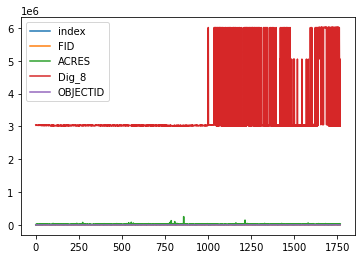

In [8]:
#Plot the data
sdfHUC12.plot()

### Create a spatial dataframe from a web service
Recall the source of the NC_NPDES.json file used in the last exercise. The data came from an ESRI web service (that we'll discuss more about later), located here:  
https://services.nconemap.gov/secure/rest/services/NC1Map_Environment/FeatureServer/4  

The ArcGIS Python API can read these services directly. 

In [ ]:
#Set the URL as a variable
theURL = 'https://services.nconemap.gov/secure/rest/services/NC1Map_Environment/FeatureServer/4'

In [ ]:
#Create a layer object from the service
feature_layer = arcgis.features.FeatureLayer(theURL)
type(feature_layer)

In [ ]:
#We can convert this to a spatial dataframe
sdf_NPDES = pd.DataFrame.spatial.from_layer(feature_layer)

In [ ]:
#Plot the spatial dataframe
sdf_NPDES.spatial.plot()